# Отчет по лабораторной №2 ML

# Кражевский Алексей, группа 13а

## Task 1

In [1]:
bread_full_price = 3.52
sale_cof = 0.45

yesterday_bread = int(input("Enter amount of yesterday's bread you bought:"))

print("*"+"Usual bread price: %5.2f".center(50) % bread_full_price + "*")
print("*"+"Price for yesterday's bread: %5.2f".center(50) % (sale_cof * bread_full_price)+"*")
print("*"+"Full price: %5.2f".center(50) % (bread_full_price * sale_cof * yesterday_bread)+"*")

Enter amount of yesterday's bread you bought: 5


*             Usual bread price:  3.52             *
*        Price for yesterday's bread:  1.58        *
*                Full price:  7.92                 *


## Task 2

In [7]:
dec_level = int(input('Enter noise level (dcb): '))

levels = {130: 'Отбойный молоток', 106: 'Газовая газонокосилка', 70: 'Будильник', 40: 'Тихая комната'}

if dec_level in levels.keys():
    print(levels[dec_level])
    quit(0)

if dec_level < 40:
    print('Меньше тихой комнаты...')
    quit(0)

if dec_level > 130:
    print('Больше отбойного молотка!')
    quit(0)

if 40 < dec_level < 70:
    print('Между', levels[40], 'и', levels[70])

if 70 < dec_level < 106:
    print('Между', levels[70], 'и', levels[106])

if 106 < dec_level < 130:
    print('Между', levels[106], 'и', levels[130])

Enter noise level (dcb):  105
Между Будильник и Газовая газонокосилка


## Task 3

In [8]:
tickets_sum = 0

while True:
    age = input('Enter age of a visitor: ')

    if age == '':
        print('Calculation stopped.')
        break

    age = int(age)

    if age < 3:
        print('You are too young!')
        continue

    if 3 <= age <= 12:
        tickets_sum += 4.5
        continue

    if age > 65:
        tickets_sum += 8.25
        continue

    tickets_sum += 12.75

print('*' + 'Total cost: %5.2f '.center(40) % tickets_sum + '*')

Enter age of a visitor:  56
Enter age of a visitor:  33
Enter age of a visitor:  3
Enter age of a visitor:  88
Enter age of a visitor:  
Calculation stopped.
*           Total cost: 38.25            *


## Task 4

### file Function.py

In [4]:
def check_triangle(a: int, b: int, c: int) -> bool:
    """
    Function to check whether triangle exists
    :param a: first side
    :param b: second side
    :param c: third side
    :return: True - if exists, False - otherwise
    """
    if a <= 0 or b <= 0 or c <= 0:
        return False

    if a >= b + c or b >= a + c or c >= a + b:
        return False

    return True


### file main.py

In [9]:
a = int(input('Enter first side: '))
b = int(input('Enter second side: '))
c = int(input('Enter third side: '))

if check_triangle(a, b, c):
    print('Triangle exists!')
else:
    print("Triangle doesn't exist...")

Enter first side:  6
Enter second side:  2
Enter third side:  1
Triangle doesn't exist...


## Task 5

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
class KNearestNeighbors:
    def __init__(self, n_neighbors):
        self.ty = None
        self.tX = None
        self.n_neighbors = n_neighbors

    def fit(self, X, y):
        self.tX = X
        self.ty = y

    def predict(self, X):
        # count of iterations (points)
        num_training = X.shape[0]
        # initialize array of predicted values
        prediction = np.zeros(num_training, dtype=self.ty.dtype)

        for i in range(num_training):
            # count distances between train points and test points
            distances = np.sqrt(np.sum(np.square(self.tX - X[i, :]), axis=1))
            # create array to store both distance and 'class'
            distance_label = np.column_stack((distances, self.ty))
            # sort by distances
            sorted_distance = distance_label[distance_label[:, 0].argsort()]
            # take k sorted distances
            k_sorted_distance = sorted_distance[:self.n_neighbors, :]
            # count occurences of each class
            (labels, occurence) = np.unique(k_sorted_distance[:, 1], return_counts=True)
            # add predicted class
            ind = np.where(occurence == np.amax(occurence))[0]
            if ind.shape:
                ind = ind[0]
            label = labels[ind]
            prediction[i] = label

        return prediction

### Simple dataset test from sci-learn documentation (test result is [0]):

In [6]:
knn = KNearestNeighbors(3)
# points
X = np.array([[0], [1], [2], [3]])
# classes for each point
y = np.array([0, 0, 1, 1])

print('Training data:\n', X)
print('Target values:\n', y)

knn.fit(X, y)
print('Prediction:\n', knn.predict(np.array([[1.1]])))

Training data:
 [[0]
 [1]
 [2]
 [3]]
Target values:
 [0 0 1 1]
Prediction:
 [0]


### Wine dataset test:

In [5]:
knn1 = KNearestNeighbors(7)
knn_check = KNeighborsClassifier(n_neighbors=7)
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)
 
knn1.fit(X_train, y_train)
knn_check.fit(X_train, y_train)

y_pred = knn1.predict(X_test)
y_pred_check = knn_check.predict(X_test)

print('Prediction:\n', y_pred)
print('Correct:\n', y_pred_check)
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Correct acc:', metrics.accuracy_score(y_test, y_pred_check))

Prediction:
 [1 1 1 2 1 0 0 1 2 2 0 1 0 1 0 1 0 0 1 0 1 0 1 2 0 1 0 0 0 1 0 0 0 1 2 0 1
 1 0 1 0 2 1 0 2 2 0 2 1 2 1 1 2 1]
Correct:
 [1 1 1 2 1 0 0 1 2 2 0 1 0 1 0 1 0 0 1 0 1 0 1 2 0 1 0 0 0 1 0 0 0 1 2 0 1
 1 0 1 0 2 1 0 2 2 0 2 1 2 1 1 2 1]
Accuracy: 0.7407407407407407
Correct acc: 0.7407407407407407


## Data visualization:

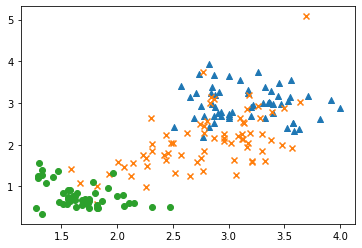

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [3]:
dict_data = load_wine(as_frame=True)
data = dict_data['data']
data['target_class'] = dict_data['target']

visualization_data = data[['od280/od315_of_diluted_wines', 'flavanoids', 'target_class']]

c0 = data[data['target_class'] == 0]
c1 = data[data['target_class'] == 1]
c2 = data[data['target_class'] == 2]

x0, y0 = c0['od280/od315_of_diluted_wines'], c0['flavanoids']
x1, y1 = c1['od280/od315_of_diluted_wines'], c1['flavanoids']
x2, y2 = c2['od280/od315_of_diluted_wines'], c2['flavanoids']

plt.scatter(x0, y0, marker='^')
plt.scatter(x1, y1, marker='x')
plt.scatter(x2, y2, marker='o')
plt.show()

data